In [1]:
"""
Jupyter notebook to check how the antisolvent screening methodology
works on a ternary diagram.

System selection
(1) glutaric acid + 1-butanol + n-hexane
(2) glutaric acid + 1-butanol + acetone
"""

'\nJupyter notebook to check how the antisolvent screening methodology\nworks on a ternary diagram.\n\nSystem selection\n(1) glutaric acid + 1-butanol + n-hexane\n(2) glutaric acid + 1-butanol + acetone\n'

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary

In [3]:
# Load ternary data
# Uses prepared data from './calculate.ipynb' notebook.

# Load n-hexane data
n_hexane_filepath = "./data/GLUTARIC_ACID_1-BUTANOL_N-HEXANE.csv"
try:
    n_hexane_data = pandas.read_csv(n_hexane_filepath)
except FileNotFoundError:
    print("Calculation data does not exist. Run example notebook before executing.")

# Extract ternary calculation data
ternary_calc_data = n_hexane_data.iloc[:, -3:].values

In [4]:
# Get initial mol fractions
init_mol = ternary_calc_data[0, :]
# Generate mol data for experiment
experi_data = np.zeros((len(ternary_calc_data) - 1, 3))
# Fill up total solute mol
experi_data[:, 0] = init_mol[0]
# Fill up total solvent mol
experi_data[:, 1] = init_mol[1]
# Fill up antisolvent mol
add_antisolv_mole = n_hexane_data["add_antisolv_mole"].values[1:-1]
experi_data[1:, 2] = add_antisolv_mole

# Calculate total mol for each point
experi_total_mol = np.sum(experi_data, axis=1)[:, np.newaxis]
# Calculate mol fraction for each point
experi_data = experi_data/experi_total_mol

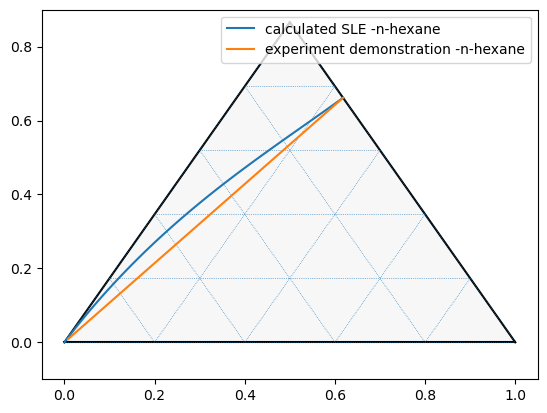

In [5]:
# Plot the calculation data and experiment-base data
fig, tax = ternary.figure(scale=1.0)
tax.boundary()
tax.gridlines(multiple=0.2)
tax.plot(ternary_calc_data, linewidth=1.5, label="calculated SLE -n-hexane")
tax.plot(experi_data, linewidth=1.5, label="experiment demonstration -n-hexane")
tax.legend()

In [6]:
# Do the same thing for when acetone is the antisolvent
acetone_filepath = "./data/GLUTARIC_ACID_1-BUTANOL_ACETONE.csv"
try:
    acetone_data = pandas.read_csv(acetone_filepath)
except FileNotFoundError:
    print("Calculation data does not exist. Run example notebook before executing.")

# Extract ternary calculation data
ternary_calc_data2 = acetone_data.iloc[:, -3:].values

In [7]:
# Get initial mol fractions
init_mol2 = ternary_calc_data2[0, :]
# Generate mol data for experiment
experi_data2 = np.zeros((len(ternary_calc_data2) - 1, 3))
# Fill up total solute mol
experi_data2[:, 0] = init_mol2[0]
# Fill up total solvent mol
experi_data2[:, 1] = init_mol2[1]
# Fill up antisolvent mol
add_antisolv_mole2 = acetone_data["add_antisolv_mole"].values[1:-1]
experi_data2[1:, 2] = add_antisolv_mole2

# Calculate total mol for each point
experi_total_mol2 = np.sum(experi_data2, axis=1)[:, np.newaxis]
# Calculate mol fraction for each point
experi_data2 = experi_data2/experi_total_mol2

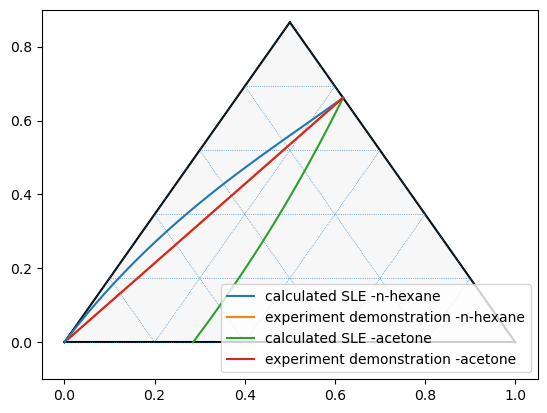

In [8]:
tax.plot(ternary_calc_data2, linewidth=1.5, label="calculated SLE -acetone")
tax.plot(experi_data2, linewidth=1.5, label="experiment demonstration -acetone")
tax.legend()
fig